# Pandas. Загрузка библиотек

## Описание и загрузка библиотеки


 -  <a href="http://pandas.pydata.org/">Pandas</a> - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [4]:
import pandas as pd # Загружаем модуль pandas

В пандас есть две структуры данных:
- Series: одномерный массив с именованными индексами (чаще всего, данные одного типа)
- DataFrame: двухмерный массив, имеет табличную структуру, легко изменяется по размерам, может содержать в себе данные разных типов

Оба типа можно создавать вручную с помощью функций из самой библиотеки:
- pandas.Series(data=None, index=None, dtype=None)
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None)

- **data** - данные, которые надо записать в структуру
- **index** - индексы строк
- **columns** - названия столбцов
- **dtype** - тип данных

Кроме data, остальные параметры опциональны


Мы, конечно, можем сами создавать датафреймы!

Например, кто-то нашел нам кусок данных и просит воспроизвести этот датасет:

<img src="https://i.imgur.com/FUCGiKP.png">

Давайте разберемся, что здесь, что и запишем в известную нам конструкцию - листы. 

In [5]:
columns = ['country', 'province', 'region_1', 'region_2'] # Создаем список, в котором будут храниться названия столбцов
index = [0, 1, 10, 100] # Создаем список, в котором будут индексы строк

# Создаем список с данными, каждая строка таблицы - отдельный список
data = [['Italy', 'Sicily & Sardinia', 'Etna', 'NaN'], 
        ['Portugal', 'Douro', 'NaN', 'NaN'],
       ['US', 'California', 'Napa Valley', 'Napa'],
       ['US', 'New York', 'Finger Lakes', 'Finger Lakes']]

А теперь соберем в датафрейм

In [6]:
df = pd.DataFrame(data, columns = columns, index = index) # Создаем ДатаФрейм (в качестве параметров передаем называние столбцов, индексы и сами данные)
df # Отображаем наш ДатаФрейм (лучше без использования функции print())

,country,province,region_1,region_2
0,Italy,Sicily & Sardinia,Etna,NaN
1,Portugal,Douro,NaN,NaN
10,US,California,Napa Valley,Napa
100,US,New York,Finger Lakes,Finger Lakes


## Загрузка и запись данных



- Функции типа **pd.read_формат** и **pd.to_формат**
считывают и записывают данные соответственно. <br /> Полный список можно найти в документации:
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Научимся считывать данные в формате csv (comma separated value) функцией:

- <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> pd.read_csv()</a>: 

Аргументов у нее очень много, критически важные:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла
 - **sep** - разделитель между данными
 - **header** - номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** - список с названиями колонок
 - **index_col** - или номер столбца, или список,  или ничего - колонка, из которой надо взять названия строк

In [7]:
data = pd.read_csv('wine_base.csv') # С помощью метода read_csv загружаем файл wine_base.csv и записываем данные в data

**Смотрим, что загрузилось**


In [8]:
data.head() # С помощью метода head выводим первые 5 строк нашего ДатаФрейма

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Что-то не то с первым столбцом, немного поправим

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

In [10]:
data = pd.read_csv('wine_base.csv', index_col = 0) # В параметре index_col указываем столбец, который будет использоваться как индекс нашего датафрейма

In [11]:
data.head(20) # С помощью метода head выводим первые 20 строк нашего ДатаФрейма

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


**Информация о загруженных данных**:

- Посчитаем, сколько записей
- Посмотрим, какого типа данные
- Проверим, есть ли пропуски

In [12]:
data.shape # Параметр .shape (так же как и в numpy-массивах) показывает размерность нашего датафрейма

(150930, 10)

In [13]:
data.size # Параметр .size (так же как и в numpy-массивах) показывает количество элементов в нашем датафрейме

1509300

In [14]:
data.count() # Метод count считает сколько всего непустых записей в каждом столбце

country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [15]:
data.head(100).count() # Применим метод .count() к первым ста записям нашего датафрейма

country        100
description    100
designation     84
points         100
price           96
province       100
region_1        92
region_2        43
variety        100
winery         100
dtype: int64

- Метод info() заодно показывает, какого типа данные в столбцах

In [16]:
data.info() # Метод .info() показывает тип каждого столбца и занимаемую память

<class 'pandas.core.frame.DataFrame'>
Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [17]:
data.dtypes # Параметр .dtypes показывает просто тип каждого столбца

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Начнем проверять на пропуски! 

- .isnull() - выдает табличку, где False - ячейка заполнена, True - ячейка пуста :( Ближайшая родня - isna()

In [18]:
data.head() # Отобразим первые 5 строк нашего датафрейма

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [19]:
data.isna().head() # Метод .isna() вместо каждого значения подставит True (значение NaN) или False (действительное значение)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False


In [20]:
data.isna().sum() # Подсчитаем количество пропусков в каждом столбце с помощью метода .sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [21]:
data.head(100).isna().sum() # Подсчитаем количество пропусков в каждом столбце для первых ста записей

country         0
description     0
designation    16
points          0
price           4
province        0
region_1        8
region_2       57
variety         0
winery          0
dtype: int64

In [22]:
data.isna().head(100).sum() # Подсчитаем количество пропусков в каждом столбце для первых ста записей (равнозначно предыдущей записи)

country         0
description     0
designation    16
points          0
price           4
province        0
region_1        8
region_2       57
variety         0
winery          0
dtype: int64

In [23]:
round(data.isna().sum() / data.shape[0], 6) # Посчитаем какую часть составляют пропуски от общего количества элементов

country        0.000033
description    0.000000
designation    0.303021
points         0.000000
price          0.090737
province       0.000033
region_1       0.166037
region_2       0.596151
variety        0.000000
winery         0.000000
dtype: float64

In [24]:
proc = data.isna().sum().sum() # Подсчитаем сколько всего пропусков (во всех столбцах) в нашем датафрейме
print(proc) # Отобразим количество посчитанных пропусков

174477


In [25]:
# Переведем полученное значение в процентное отображение
proc = data.isna().sum().sum() / data.size
print(round(100*proc,1), '%', sep='')

11.6%


### Как оценить пропуски визуально



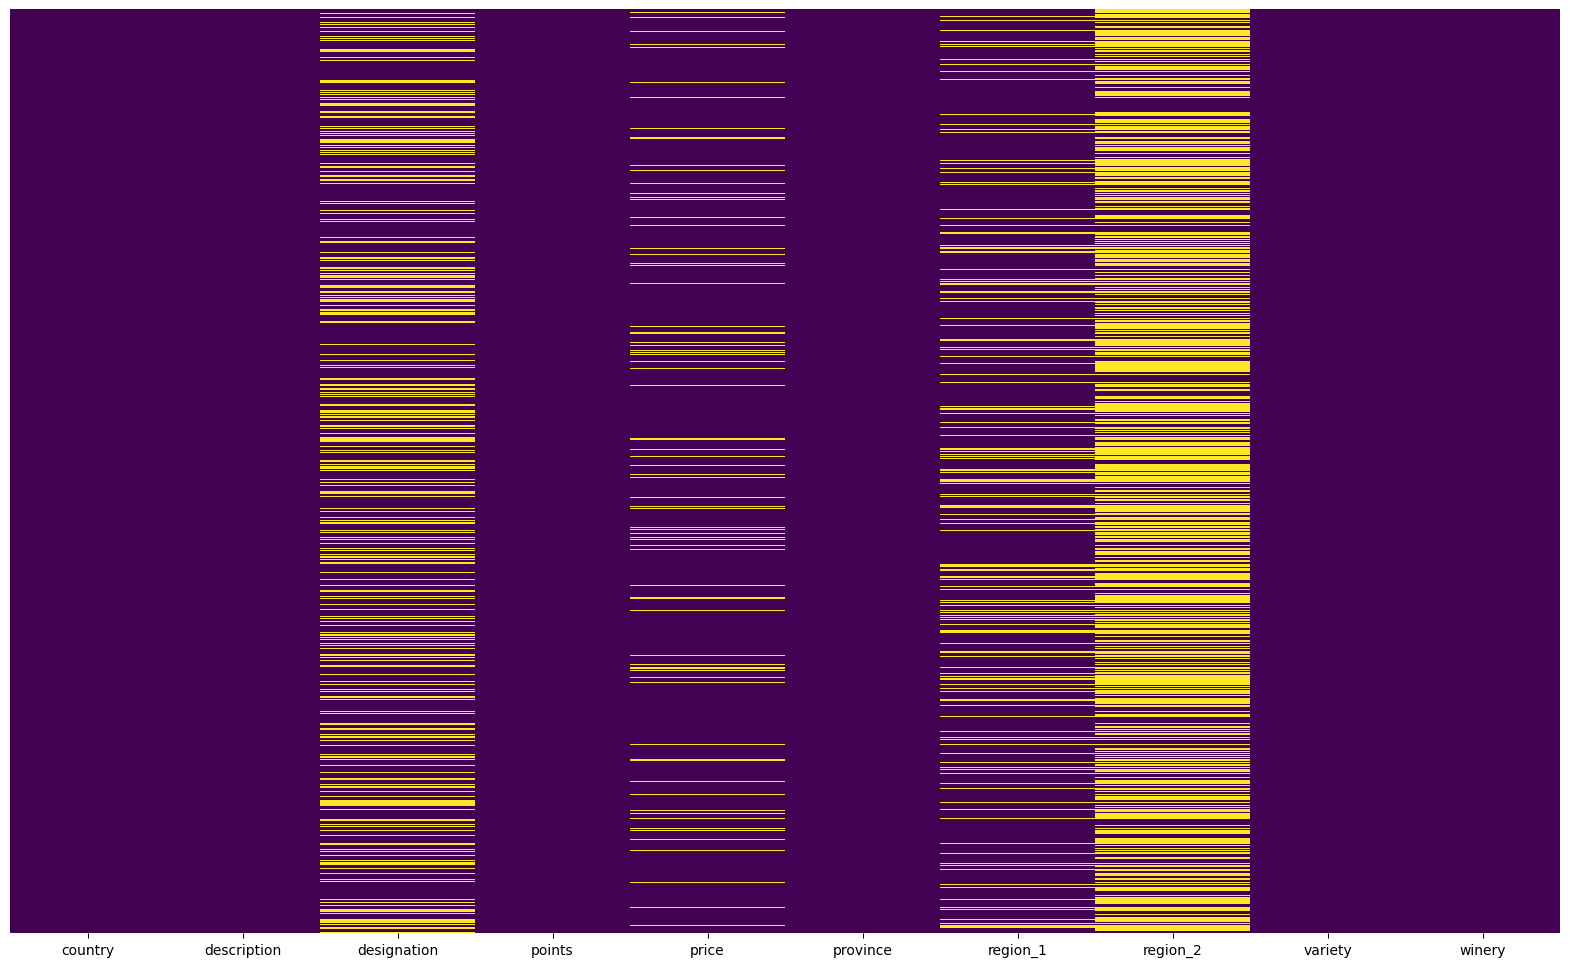

In [26]:
import matplotlib.pyplot as plt # Загружаем модуль matplotlib.pyplot
import seaborn as sns # Загружаем модуль seaborn
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show() # Отображаем график

Что с ним делать?

Выбора не очень много: <br>

1) Удалять: 
- dropna(axis=0, how='any'): axis = 0 - удаляем построчно, axis = 1 выкидываем столбец; how ='any' - выкидываем, если есть хотя бы одна ячейка пустая. how = 'all' - выкидываем, если есть полностью пустая строка или столбец

2) Вставлять информацию самим:
- fillna() - это отдельное искусство, как заполнять. 

In [27]:
data.fillna("Гость").head(10) # С помощью метода .fillna() заменяем все пропуски словом Python

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Гость,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Гость,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Гость,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Гость,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,Гость,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Описательные статистики



Теперь посмотрим, а что содержательно у нас есть на руках. 

Глазами просматривать не будем, а попросим посчитать основные описательные статистики. Причем сразу все.

- describe() - метод, который возвращает табличку с описательными статистиками. В таком виде считает все для числовых столбцов

In [28]:
data.describe() # Отобразим описательные статистики нашего датафрейма (только числовые данные)

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


Немножко магии, и для нечисловых данные тоже будут свои описательные статистики. 

In [29]:
data.describe(include=['O']) # # Отобразим описательные статистики нашего датафрейма ('O' - в том числе и строковые)

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


### Срезы данных



Допустим, нам не нужен датасет, а только определенные столбцы или строки или столбцы и строки. 


Как делать?
Помним, что:
- у столбцов есть названия
- у строк есть названия
- если нет названий, то они пронумерованы с нуля

Основываясь на этой идее, мы начнем отбирать данные.

In [30]:
data.head(1) # Отобразим первую строчку датафрейма

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


#### Отбираем по столбцам. Версия 1. 

In [31]:
array = data['designation'] # Отобразим столбец 
array

0                            Martha's Vineyard
1         Carodorum Selección Especial Reserva
2                Special Selected Late Harvest
3                                      Reserve
4                                   La Brûlade
                          ...                 
150925                                     NaN
150926                          Cuvée Prestige
150927                           Terre di Dora
150928                         Grand Brut Rosé
150929                                     NaN
Name: designation, Length: 150930, dtype: object

In [32]:
data.price

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

In [33]:
data.price.head() # Отобразим столбец price (альтернативные вариант)

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

In [34]:
new_df = data[['price','country']].head() # Отобразим столбцы 'price' и 'country'
new_df

,price,country
0,235.0,US
1,110.0,Spain
2,90.0,US
3,65.0,US
4,66.0,France


#### Отбираем по  строкам. Версия 1. 

In [35]:
data[10:20] # Отобразим с 10й по 20ю строки датафрейма

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell


In [36]:
data[10:20:3] # Отобразим с 10й по 20ю строки датафрейма с шагом 2

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell


In [37]:
data[::5].head(10) # Отобразим каждую 5ю строку датафрейма

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
20,US,Heitz has made this stellar rosé from the rare...,Grignolino,95,24.0,California,Napa Valley,Napa,Rosé,Heitz
25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90,15.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
40,Spain,Earthy plum and cherry aromas score points for...,Amandi,90,17.0,Galicia,Ribeira Sacra,NaN,Mencía,Don Bernardino
45,Italy,"A blend of 90% Sangiovese and 10% Canaiolo, th...",Vigneto Odoardo Beccari Riserva,90,30.0,Tuscany,Chianti Classico,NaN,Red Blend,Vignavecchia


#### Отбор по столбцам. Версия 2. Все еще по названиям 

In [38]:
data.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [39]:
data.loc[4:7, ['price', 'points']] # Отобразим два столбца 'price' и 'points', и в них строки с индексами с 4 по 7

,price,points
4,66.0,95
5,73.0,95
6,65.0,95
7,110.0,95


#### Отбор по  строкам. Версия 2. Все еще по названиям 

In [40]:
data.loc[:5,:] # Отобразим строки с индексом от 0 до 5  (то же, что и data.loc[:5])

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


#### Отбор по строчкам и столбцам. Версия 3. По номеру строк и столбцов

In [41]:
data.iloc[::5, [1,3]].head() # Отобразим каждую 5 строку и 1 и 3 столбец

,description,points
0,This tremendous 100% varietal wine hails from ...,96
5,"Deep, dense and pure from the opening bell, th...",95
10,"Elegance, complexity and structure come togeth...",95
15,"First made in 2006, this succulent luscious Ch...",95
20,Heitz has made this stellar rosé from the rare...,95


#### Отбор с условиями

Так, а если мне нужны вина дороже 15 долларов? Как быть?

In [62]:
#задаем маску
mask = data['price'] > 15

In [63]:
mask.head() # Отобразим маску

0    True
1    True
2    True
3    True
4    True
Name: price, dtype: bool

In [67]:
#и отбираем данные
temp = data[mask] # Выбираем данные из датафрейма в соответствии с маской и записываем их в новый даатафрейм temp
temp.sort_values('price') # Отображаем temp
temp.shape

(103342, 10)

In [45]:
data[data.price>300].head()# Альтернативный вариант

,country,description,designation,points,price,province,region_1,region_2,variety,winery
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
898,Italy,"Aromas of crushed plum, asphalt, oak, toast, e...",Sorì Tildin,92,500.0,Piedmont,Langhe,NaN,Red Blend,Gaja
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2155,France,There is a sense of pure juicy black-currant f...,NaN,97,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
2159,France,"With seriously dense tannins, this shows great...",NaN,97,330.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion


In [46]:
data[(data.price > 200) & ((data.country == 'US') | (data.country == 'France'))].head(15) # Составное условие

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2155,France,There is a sense of pure juicy black-currant f...,NaN,97,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
2159,France,"With seriously dense tannins, this shows great...",NaN,97,330.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion
2434,France,"With 83% Sémillon in the blend, this wine has ...",NaN,97,698.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château La Mission Haut-Brion
2673,France,"As with Clos de Vougeot in red, every producer...",NaN,90,238.0,Burgundy,Corton-Charlemagne,NaN,Chardonnay,Jean-Luc and Paul Aegerter
2733,France,"Richly endowed, the wine is beautifully concen...",NaN,95,202.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château La Mission Haut-Brion
2742,France,This is a powerfully structured wine from a 18...,NaN,95,250.0,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château Trotanoy


### Мультииндексация

*группировка по параметрам и характеристикам*


In [47]:
data.head() # Отобразим наш датафрем

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [69]:
data_ = data.groupby(['country','price']).count() # Сграппируем данные сначала по странам, а затем по price
data_.head(50) # Отобразим первые 50 строк нового датафрейма

description  designation  points  province  region_1  \
country   price                                                         
Albania   20.0             2            0       2         2         0   
Argentina 4.0              3            2       3         3         3   
          5.0              9            1       9         9         9   
          6.0             74           19      74        74        74   
          7.0             61           19      61        61        61   
          8.0            135           33     135       135       135   
          9.0            291          103     291       291       291   
          10.0           564          317     564       564       564   
          11.0           382          252     382       382       382   
          12.0           560          341     560       560       560   
          13.0           443          251     443       443       443   
          14.0           224          142     224       224       224   
          15.0           466          367     466       466       466   
          16.0           175          146     175       175       175   
          17.0           168          121     168       168       168   
          18.0           219          178     219       219       219   
          19.0           122          101     122       122       122   
          20.0           341          284     341       341       338   
          21.0            56           54      56        56        56   
          22.0            79           64      79        79        79   
          23.0            61           51      61        61        61   
          24.0            45           45      45        45        45   
          25.0           173          158     173       173       173   
          26.0            18           17      18        18        18   
          27.0            33           29      33        33        33   
          28.0            31           25      31        31        31   
          29.0            23           19      23        23        23   
          30.0           114           96     114       114       114   
          31.0             1            1       1         1         1   
          32.0            22           17      22        22        22   
          33.0             6            6       6         6         5   
          34.0             9            9       9         9         9   
          35.0            63           63      63        63        63   
          36.0            15           15      15        15        15   
          37.0             3            3       3         3         3   
          38.0            15           15      15        15        15   
          39.0             7            7       7         7         7   
          40.0            53           51      53        53        53   
          41.0             2            2       2         2         2   
          42.0            13           10      13        13        13   
          43.0             4            4       4         4         4   
          44.0             6            6       6         6         6   
          45.0            63           52      63        63        63   
          46.0             5            5       5         5         5   
          47.0             8            8       8         8         8   
          48.0             4            4       4         4         4   
          49.0             9            9       9         9         9   
          50.0           109          105     109       109       109   
          52.0             3            3       3         3         3   
          53.0             6            6       6         6         6   

                 region_2  variety  winery  
country   price                             
Albania   20.0          0        2       2  
Argentina 4.0           0        3       3  
          5.0           0        9      

In [49]:
data_.loc['US'] # Отобразим все данные для 'US'

,description,designation,points,province,region_1,region_2,variety,winery
price,,,,,,,,
4.0,9,2,9,9,9,9,9,9
5.0,33,16,33,33,33,32,33,33
6.0,58,13,58,58,58,58,58,58
7.0,206,58,206,206,206,203,206,206
8.0,458,188,458,458,456,444,458,458
...,...,...,...,...,...,...,...,...
350.0,5,0,5,5,5,4,5,5
450.0,1,0,1,1,1,1,1,1
500.0,3,2,3,3,3,3,3,3


In [50]:
data_.loc['US', 100] # Отобразим данные для 'US', у кого 100 points

description    318
designation    261
points         318
province       318
region_1       318
region_2       317
variety        318
winery         318
Name: (US, 100.0), dtype: int64

#### Как изменять значения в табличке



In [51]:
data_backup = data.copy() # Создаем копию нашего датафрейма и записываем в переменную data_backup
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [52]:
data.iloc[0,1] = 'kotiki' # Вставляем новое значение в 0 строку и 1 стоблец
data.iloc[2,2] = '129' # Вставляем новое значение в 2 строку и 2 стоблец
data.iloc[3:5,2:5] = 'new' # Вставляем новое значение с 3 по 5 строку и со 2го по 5ый стоблец
data.head(8)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,kotiki,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,129,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",new,new,new,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",new,new,new,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


In [53]:
data = data_backup.copy() # Восстанавливаем данные из копии

In [54]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [55]:
data.loc[data.country == 'US', 'region_2'] = 'Syberia'
data.loc[data.price > 100, 'points'] = 200
data.loc[data.price > 100, 'price'] = 1000
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,200,1000.0,California,Napa Valley,Syberia,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,200,1000.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Syberia,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Syberia,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Перевод в Numpy



In [56]:
np_data = data.values # Получаем данные из датафрейма и записываем их в переменную np_data
print(np_data.shape) # Выводим размерность np_data
np_data.dtype

(150930, 10)


dtype('O')

In [57]:
print(np_data[0]) # Выводим 0ой элемент из массива

['US'
 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 "Martha's Vineyard" 200 1000.0 'California' 'Napa Valley' 'Syberia'
 'Cabernet Sauvignon' 'Heitz']


In [58]:
# Выведем первые 10 элементов из np_data
for i in range(10):
  print(np_data[i])

['US'
 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 "Martha's Vineyard" 200 1000.0 'California' 'Napa Valley' 'Syberia'
 'Cabernet Sauvignon' 'Heitz']
['Spain'
 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.'
 'Carodorum Selección Especial Reserva' 200 1000.0 'Northern Spain' 'Toro'
 nan 'Tinta de Toro' 'Bodega Carmen Rodríguez']
['US'
 'Mac Watson honors the memory of a wine once made by his mother in this tr

# **Глоссарий**


pd.DataFrame(данные, columns = [колонки, если есть], index = [индексы ,если есть]) - создать датафрейм

pd.read_csv(полный адрес расположения файла) - открыть .csv файл

------------

.head() - посмотреть верхушку датафрейма (первые n строк)

.tail() - посмотреть конец датафрейма (последние n строк)

.columns - список колонок датафрейма

.values - вывести массив всех значений датафрейма

.index - список индексов датафрейма

.tolist() - перевести в список

.count() - посчитать количество определенных величин во фрейме

.describe() - посмотреть основные статистические характеристики фрейма

.shape - форма фрейма (строки, колонки)

.size - размер фрейма строки*колонки

.info() - информация о данных каждой колонки

.dtypes - тип данных каждой колонки

.isnull() - где недостает значений

.isna()- есть ли значения None

.dropna() - выкинуть строки/колонки с None

.fillna() - заполнить заданным значеним ячейки, где есть None

.loc[] - вывести значения по названиям колонок

.iloc[] - вывести значения по индексам колонок

.drop() - выкинуть определенные значения

--------------

pd.to_datetime(колонка, которую переводим в формат временного ряда)

.groupby() - сгруппировать по конкретному признаку

.copy() - создать копию

.sort_values() - сортировка значений

pd.concat([df1,df2]) - конкатенация фреймов

.merge(второй_датафрейм, on = 'общая колонка, по которой склеиваем', how = 'с какой стороны') - конкатенация фреймов через общий признак

-------------


.corr() - вычислить корреляцию

.median() - вычислить медиану

.cumsum() - вычислить куммулятивную сумму

.cumprod() - вычислить коммулятивное произведение

.cummax() - вычислить коммулятивный максимум

-------------

.quantile([]) - вычислить квантили

.nunique() - уникальные значения для n-колонок/строк

.unique() - уникальные значения определенной колонки/строк

------------

.apply(функция) - применить функцию для колонки/строки

.agg(набор_функций) - применить ряд функций для колонки/строки
